In [4]:
import pymc3 as pm

with pm.Model() as model:
    parameter = pm.Exponential('poisson_param', 1.0)
    data_geneartor = pm.Poisson('data_generator', parameter)

In [6]:
with model:
    data_plus_one = data_geneartor + 1

In [7]:
parameter.tag.test_value

array(0.6931471824645996)

In [10]:
with pm.Model() as model2:
    betas = pm.Uniform('betas', 0, 1, shape=10)

In [13]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1.0)
    lambda_2 = pm.Exponential("lambda_2", 1.0)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

new_deterministic_variable = lambda_1 + lambda_2

In [14]:
import numpy as np

n_data_points = 5
idx = np.arange(n_data_points)
with model:
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

(0, 8)

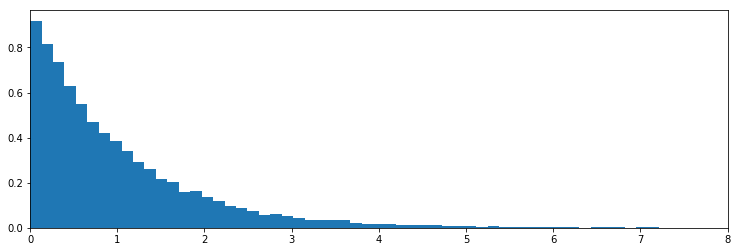

In [35]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype='stepfilled')
plt.xlim(0, 8)

In [37]:
data = np.array([10, 5])
with model:
    fixed_variable = pm.Poisson('fxd', 1, observed=data)
print('value: {}'.format(fixed_variable.tag.test_value))

ValueError: Variable name fxd already exists.

In [38]:
tau = np.random.randint(0, 80)
tau

39

In [39]:
alpha = 1./20.
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)
(lambda_1, lambda_2)

(13.533007722193481, 5.9635960068515717)

In [41]:
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80 - tau)]
data

array([11, 16, 19, 13, 20, 15, 11, 13, 19,  6, 17, 14, 12, 17, 15, 14, 13,
       15, 11, 14, 14,  8, 10, 14, 15, 17,  9, 11, 13, 13, 10, 11, 13, 10,
       17, 28, 16,  9, 13, 10, 10,  5,  2,  5,  5,  5,  5,  7,  7,  8,  6,
        8,  4,  7,  4,  4,  4,  8,  8,  1,  8, 10,  8,  4,  5,  3,  3,  5,
        6,  3, 11,  7,  5, 10,  6,  3,  5,  8,  2,  6])

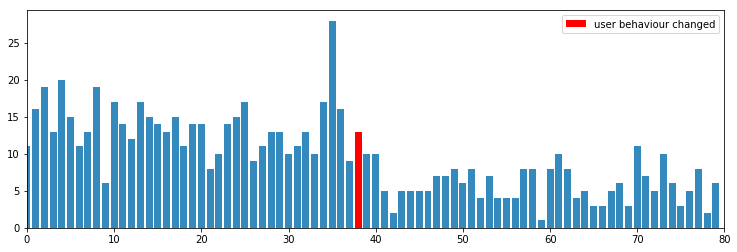

In [42]:
plt.bar(np.arange(80), data, color='#348abd')
plt.bar(tau-1, data[tau-1], color='r', label='user behaviour changed')
plt.xlim(0, 80)
plt.legend()

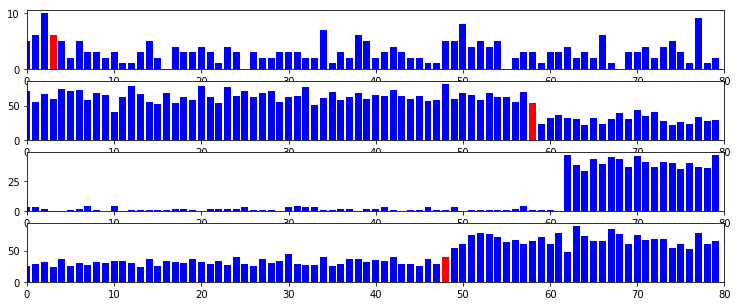

In [43]:
def plot_artificial_sms_dataset():
    tau = stats.randint.rvs(0, 80)
    alpha = 1./20.
    lambda_1, lambda_2 = stats.expon.rvs(scale=1/alpha, size=2)
    data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80-tau)]
    plt.bar(np.arange(80), data, color='blue')
    plt.bar(tau-1, data[tau-1], color='r', label='user behaviour changed')
    plt.xlim(0, 80)
    
figsize(12.5, 5)
for i in range(4):
    plt.subplot(4, 1, i+1)
    plot_artificial_sms_dataset()